Atomic Frequency Comb Efficiency Modelling
Finley Giles-Book - fdg2@hw.ac.uk - 30/11/2020

Modelling the efficiency equations for impedance-matched cavity enhanced AFC storage

Based off paper 3 from README

In [1]:
import matplotlib.pyplot as plt
import numpy as np 

# reduction in effieiceny due to AFC teeth have finite width
def eta_F(F):   # assumes gaussian teeth 
    
    eta = np.exp(-7/F**2)
    
    return eta

#This model takes into a count the imperfect background radiation.
def eta_cavity(d_tilde,R1,R2,eta_F,d0):
    
    eta = ((2 * d_tilde * np.exp(-d_tilde) * (1 - R1) * np.sqrt(R2) * np.sqrt(eta_F) * np.exp(-d0)) / (1 - np.sqrt(R1 * R2) * np.exp(-d_tilde))**2)
    
    return eta

In [2]:
R1 = 0.99           # Mirror 1 reflectivity
R2 = 1              # Mirror 2 reflectivity
d = 1               # Optical depth
F = 10              # AFC Finesse
d0 = 0.1            # Background optical power
d_tilde = d/F       # Effectve optical depth

print(eta_cavity(d_tilde,R1,R2,eta_F(F),d0))

0.15907308782901486


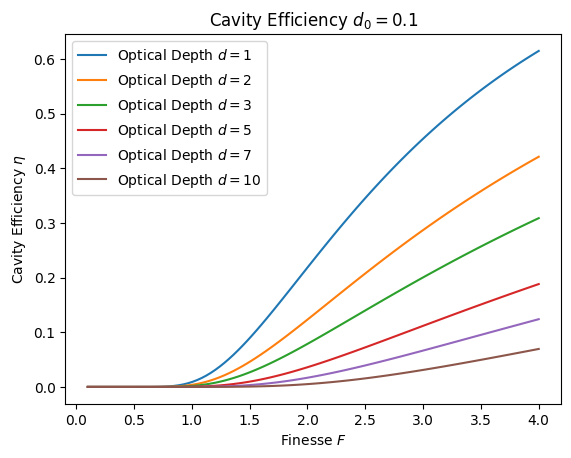

In [3]:
R1 = 0.8
R2 = 1
d = [1,2,3,5,7,10]
F = np.linspace(0.1,4,100)

fig1 = plt.figure()
plt.title(r'Cavity Efficiency $d_0 = %.1f$' %d0)

for k in range(0,len(d)):
    plt.plot(F,eta_cavity(d[k]/F,R1,R2,eta_F(F),d0), label = r'Optical Depth $d = %d$' %d[k])
    
plt.xlabel(r'Finesse $F$')
plt.ylabel(r'Cavity Efficiency $\eta$')
plt.legend()

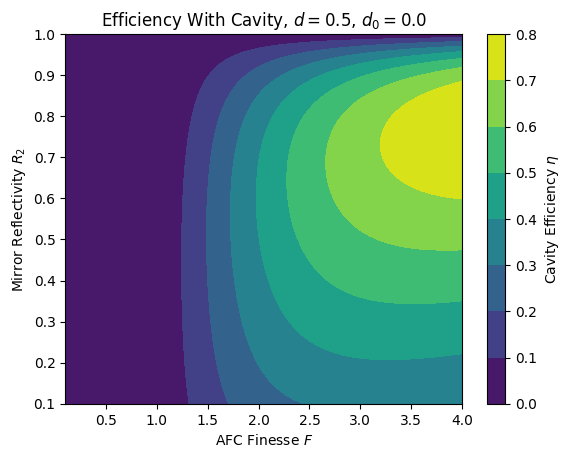

In [4]:
R2 = 1
R1 = np.linspace(0.1,1,100)
d = 0.5
F = np.linspace(0.1,4,100)
d0 = 0.01

Fv, R1v = np.meshgrid(F,R1)

d_tildev = d/Fv

fig2 = plt.figure()
plt.title(r'Efficiency With Cavity, $d = %.1f$, $d_{0} = %.1f$' %(d, d0))

plt.contourf(Fv,R1v,eta_cavity(d_tildev,R1v,R2,eta_F(Fv),d0))
plt.xlabel(r'AFC Finesse $F$')
plt.ylabel(r'Mirror Reflectivity $R_2$')
cbar1 = plt.colorbar(plt.contourf(Fv,R1v,eta_cavity(d_tildev,R1v,R2,eta_F(Fv),d0)))
cbar1.set_label(r'Cavity Efficiency $\eta$')